<a href="https://colab.research.google.com/github/RajeswariSahu/Data-Science-Projects/blob/main/PRCP_1021_InsCostPred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# PRCP-1021-InsCostPred

In [ ]:
# import basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [ ]:
# import data
data=pd.read_csv('insurance cost prediction.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Columns

•	age: age of primary beneficiary

•	sex: insurance contractor gender, female, male

•	bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

•	children: Number of children covered by health insurance / Number of dependents

•	smoker: Smoking

•	region: the beneficiary's residential area in the US, northeast, southeast,
 southwest, northwest.

•	charges: Individual medical costs billed by health insurance

*  Here charges column is the target variable and rest of the columns are features.




# Basic Checks

In [ ]:
data.shape    # check no.of rows and columns

(1338, 7)

In [ ]:
data.columns     # checks name of all columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
data.head()    # show first five rows

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data.tail()    # show last five rows

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
data.dtypes     # check datatype of all columns

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data.describe()    # shows statistical report

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
data.describe(include='O')     # shows statistical report of object datatype

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [ ]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
data.duplicated().sum()    # check duplicate values

1

In [ ]:
# check no.of categories and value counts of categorical columns
x=['sex','smoker','children','region']
for i in x:
  print(i,data[i].unique())
  print('**********************')
  print(i, data[i].value_counts())
  print('-----------------------')

sex ['female' 'male']
**********************
sex male      676
female    662
Name: sex, dtype: int64
-----------------------
smoker ['yes' 'no']
**********************
smoker no     1064
yes     274
Name: smoker, dtype: int64
-----------------------
children [0 1 3 2 5 4]
**********************
children 0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64
-----------------------
region ['southwest' 'southeast' 'northwest' 'northeast']
**********************
region southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64
-----------------------


# Exploratory Data Analysis

## Univariate Analysis

In [ ]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 31.0 MB/s eta 0:00:00


In [ ]:
import sweetviz as sv
my_report=sv.analyze(data)
my_report.show_html('my_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report my_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Insights from Univariate Analysis

*   age-The percentage of age group of 19-20 to whom the cost billed by the health insurance is highest.
*   sex-The above graph shows that 51% insurance contractor was male and 49% was female.

* children-When number of dependents is zero,43% is covered by health insurance.
When there is one children,only 24% is covered.18% is covered when there is two children.12% is covered when there is three children.2% is covered when there is four children and only 1% is covered when there is five children.
*  smoker-From the report it is clearly seen that 80% are not smoker and only 20% are smoker.

*  27% beneficiary's residenceis from southeast.24% are from southwest.24% are from northwest and 24% are from northeast in the US.








# Bivariate Analysis

In [ ]:
c_col=data[['children','sex','smoker','region']]
c_col

,children,sex,smoker,region
0,0,female,yes,southwest
1,1,male,no,southeast
2,3,male,no,southeast
3,0,male,no,northwest
4,0,male,no,northwest
...,...,...,...,...
1333,3,male,no,northwest
1334,0,female,no,northeast
1335,0,female,no,southeast
1336,0,female,no,southwest


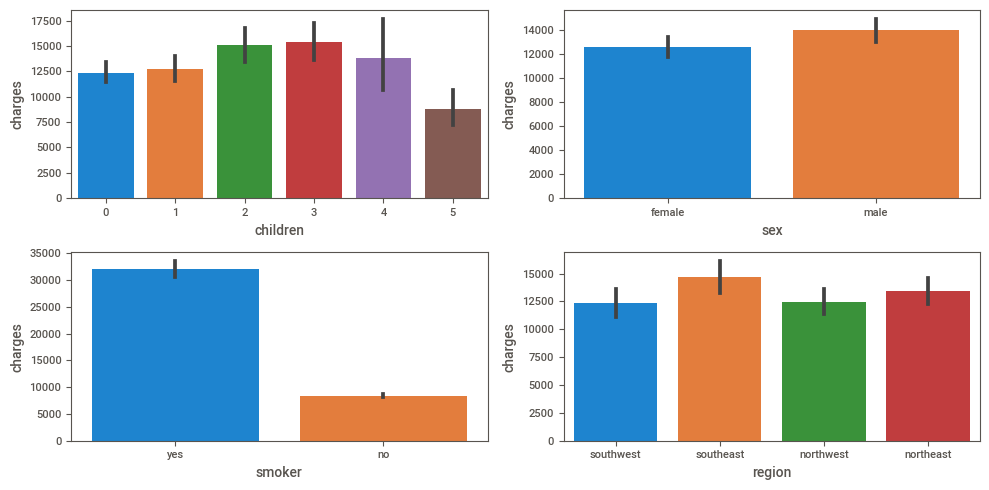

In [ ]:
plt.figure(figsize=(10,5),facecolor='white')
plotnum=1
for column in c_col:
  if plotnum<=4:
    ax=plt.subplot(2,2,plotnum)
    sns.barplot(x=column,y='charges',data=data)
    plt.xlabel(column,fontsize=10)
    plt.ylabel('charges',fontsize=10)
  plotnum+=1
plt.tight_layout()

## Insights from the bivariate analysis

 1.  When we compare children with charges,we have seen in the graph that when there are 2 or 3 children,medical cost billed by the health insurance is $15000.

*   The  least  amount paid by the health insurance which is nearly $10000 when there is 5 children.
2. The bar graph shows that charges paid by the health insurance is more for male than female insurance contractor.
3. charges paid by the health insurance is more for smoker than who are not smoker.

4. For southeast region,the health insurance paid highest amount of dollar that is nearly $15000. In the second and third position northeast and southwest regions are there respectively.




In [ ]:
nu_col=data[['age','bmi']]
nu_col

,age,bmi
0,19,27.900
1,18,33.770
2,28,33.000
3,33,22.705
4,32,28.880
...,...,...
1333,50,30.970
1334,18,31.920
1335,18,36.850
1336,21,25.800


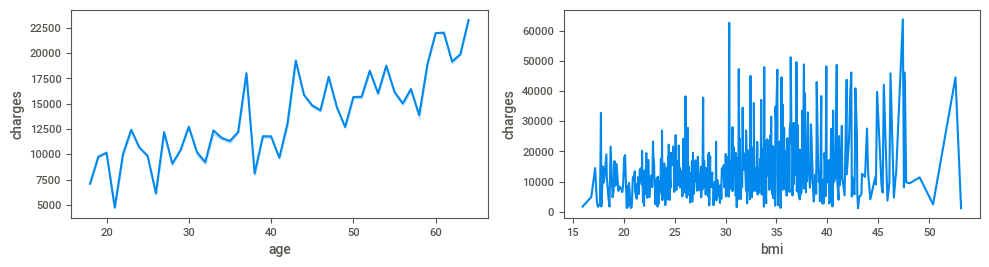

In [ ]:
plt.figure(figsize=(10,5),facecolor='white')
plotnum=1
for column in nu_col:
  if plotnum<=4:
    ax=plt.subplot(2,2,plotnum)
    sns.lineplot(x=column,y='charges',data=data,ci=True)
    plt.xlabel(column,fontsize=10)
    plt.ylabel('charges',fontsize=10)
  plotnum+=1
plt.tight_layout()



*   When age is increasing,the charges are also increasing.When age is nearly 40,the charges was moving down.
*   For bmi and charges,there is no clear insight is coming.



# Multivariate Analysis

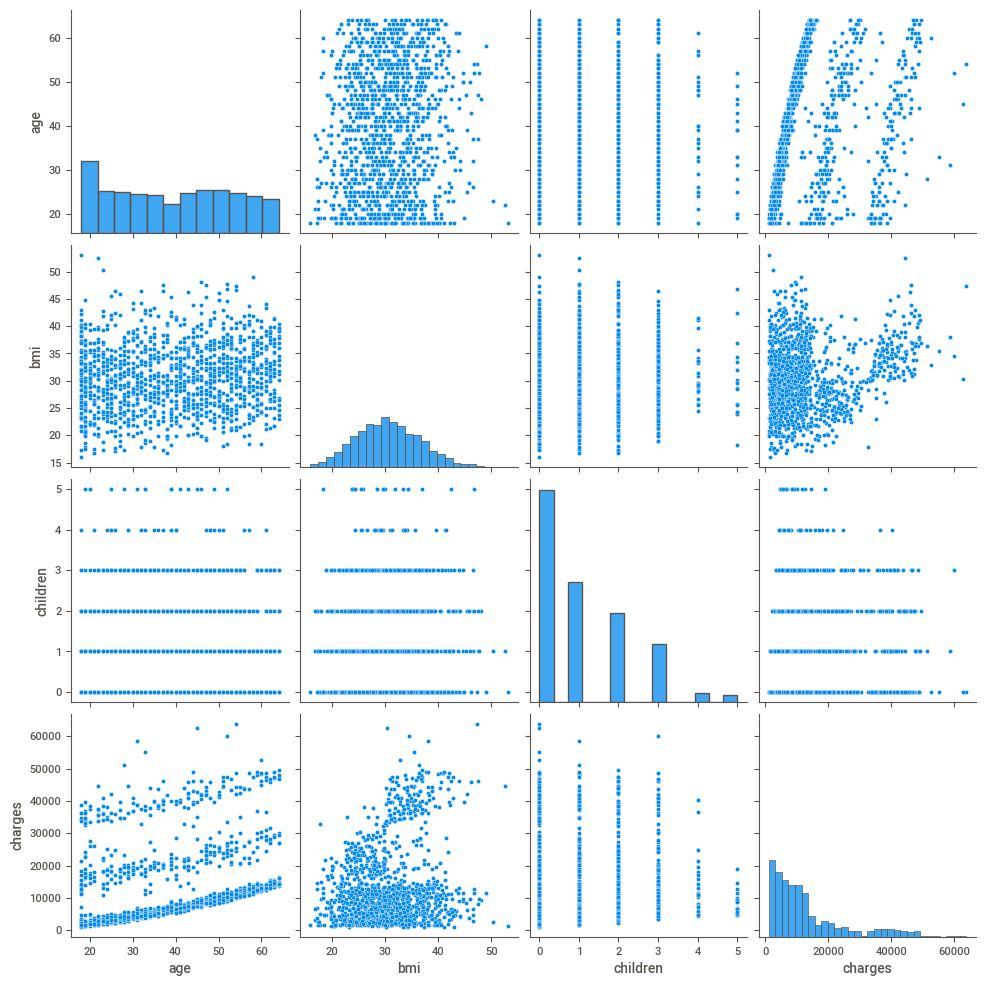

In [ ]:
sns.pairplot(data=data)

# Data Preprocessing

In [ ]:
# check null value
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
# check duplicated value
data.duplicated().sum()

1

In [ ]:
data = data.drop_duplicates(keep='first')

In [ ]:
data.duplicated().sum()   # check no.of duplicate values after dropping

0

In [ ]:
num_col=data[['age','bmi']]

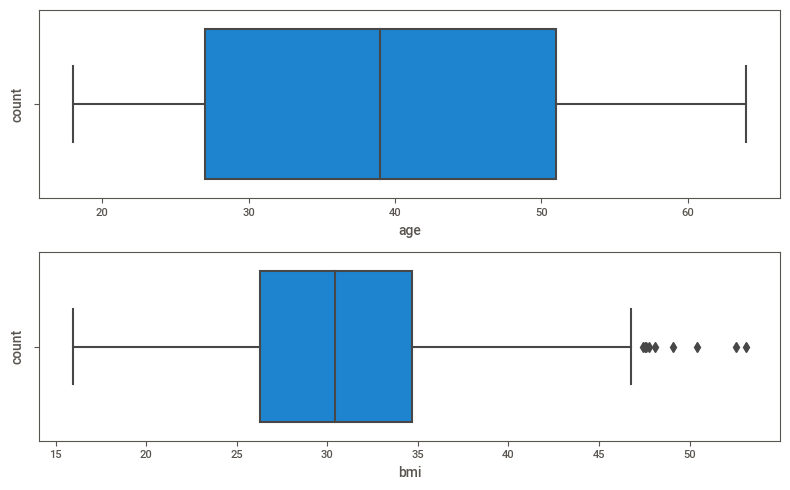

In [ ]:
# finding outliers
plt.figure(figsize=(8,5),facecolor='white')
plotnum=1
for column in num_col:
  if plotnum<=2:
    ax=plt.subplot(2,1,plotnum)
    sns.boxplot(x=data[column],data=data)
    plt.xlabel(column,fontsize=10)
    plt.ylabel('count',fontsize=10)
  plotnum+=1
plt.tight_layout()

It is clearly seen in the graph that there is outliers in bmi column.To handle those outliers, first we have check the distribution of that column.

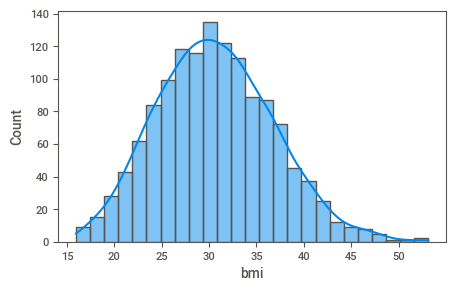

In [ ]:
# check distribution of bmi
plt.figure(figsize=(5,3))
sns.histplot(data=data,x='bmi',kde=True)
plt.show()

Clearly we see outliers in bmi and distribution of bmi is normal.So we will use 3-sigma method to identify the outliers.

Replace outliers with mean since data is normal.

In [ ]:
# Apply 3-sigma rule to handle outliers
# find lower_limit and upper_limit
lower_limit=data['bmi'].mean()-3*data['bmi'].std()
upper_limit=data['bmi'].mean()+3*data['bmi'].std()

In [ ]:
## find values below lower limit
data.loc[data['bmi']<lower_limit]

,age,sex,bmi,children,smoker,region,charges


In [ ]:
## find values above upper limit
data.loc[data['bmi']>upper_limit]

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.3254
847,23,male,50.38,1,no,southeast,2438.0552
1047,22,male,52.58,1,yes,southeast,44501.3982
1317,18,male,53.13,0,no,southeast,1163.4627


In [ ]:
## find percentage of outliers
len(data.loc[data['bmi']>upper_limit])/len(data)*100

0.2991772625280479

In [ ]:
# how to handle outliers
## since data is normal,we will replace outliers with mean
data.loc[data['bmi']>upper_limit,'bmi']=data['bmi'].mean()

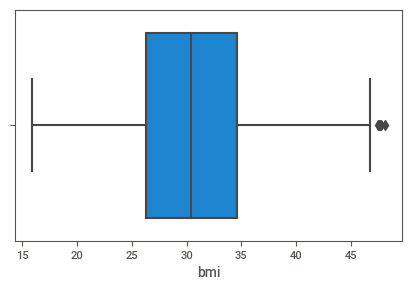

In [ ]:
## check ,are there any outliers in bmi
plt.figure(figsize=(5,3))
sns.boxplot(x='bmi',data=data)
plt.show()

In [ ]:
## find percentage of outliers after replaceing with mean
len(data.loc[data['bmi']>upper_limit])/len(data)*100

0.0

In [ ]:
## Scaling Data
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
data[['age','bmi']]=scale.fit_transform(data[['age','bmi']])

In [ ]:
data1=data.copy()
data1.head(2)

,age,sex,bmi,children,smoker,region,charges
0,0.021739,female,0.371847,0,yes,southwest,16884.9240
1,0.000000,male,0.554656,1,no,southeast,1725.5523


In [ ]:
# converting categorical data to numerical data
df1=pd.get_dummies(data1['sex'],prefix='sex',drop_first=True)
data1=pd.concat([data1,df1],axis=1).drop('sex',axis=1)

In [ ]:
data1.head(2)

,age,bmi,children,smoker,region,charges,sex_male
0,0.021739,0.371847,0,yes,southwest,16884.9240,0
1,0.000000,0.554656,1,no,southeast,1725.5523,1


In [ ]:
df1=pd.get_dummies(data1['smoker'],prefix='smoker',drop_first=True)
data1=pd.concat([data1,df1],axis=1).drop('smoker',axis=1)

In [ ]:
data1.head(2)

,age,bmi,children,region,charges,sex_male,smoker_yes
0,0.021739,0.371847,0,southwest,16884.9240,0,1
1,0.000000,0.554656,1,southeast,1725.5523,1,0


In [ ]:
data1['region'].value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

In [ ]:
# converting categorical data to numerical data
data1.region=data1.region.map({'southeast':3,'southwest':2,'northwest':1,'northeast':0})

In [ ]:
data1.head()

,age,bmi,children,region,charges,sex_male,smoker_yes
0,0.021739,0.371847,0,2,16884.92400,0,1
1,0.000000,0.554656,1,3,1725.55230,1,0
2,0.217391,0.530676,3,3,4449.46200,1,0
3,0.326087,0.210059,0,1,21984.47061,1,0
4,0.304348,0.402367,0,1,3866.85520,1,0


# Feature Selection

In [ ]:
cor_data=data1[['age','bmi','children']]

In [ ]:
cor_data.corr()

,age,bmi,children
age,1.000000,0.118650,0.041536
bmi,0.118650,1.000000,0.018031
children,0.041536,0.018031,1.000000


<Axes: >

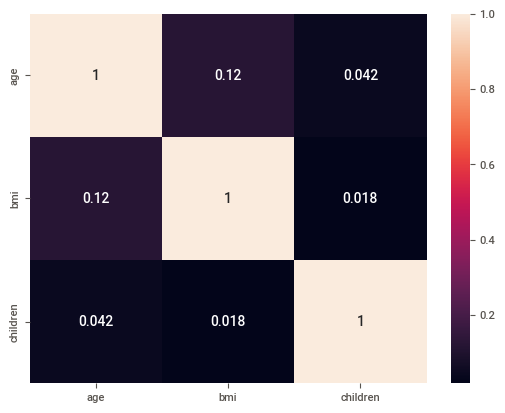

In [ ]:
# Finding the correlation by using heatmap
sns.heatmap(cor_data.corr(),annot=True)

# Model Creation

# Linear Regression

In [ ]:
# split data into x and y
x=data1.drop('charges',axis=1)
y=data1['charges']

In [ ]:
# split data for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=4)

In [ ]:
x_train.shape

(935, 6)

In [ ]:
x_test.shape

(402, 6)

In [ ]:
## import linear regression model
from sklearn.linear_model import LinearRegression

In [ ]:
# initialise the model
model1=LinearRegression()

In [ ]:
# train model with x_train and y_train
model1.fit(x_train,y_train)

LinearRegression()

In [ ]:
# make predictions / test model
y_pred=model1.predict(x_test)
y_pred

array([27352.98659546, 11289.15166868, 12063.70921978, 11791.24875817,
       13205.76721645,  1488.64943604, 15196.48866407, 32510.99249081,
       36802.8693023 ,  2276.36737411, 10562.64112937, 34116.00438105,
       26070.17059864, 14162.03122227, 17393.34540865, 41061.2084445 ,
       11909.34096755, 15444.88069624, 39053.95099987,  2957.54410522,
        2448.85266917, 15380.73911997,  8777.83374016,  3790.92810315,
        9284.50405741, 32387.39564337, 37827.37135283,  9407.54023668,
       32590.58892543, 10425.65029256,   122.63289049,  2056.549475  ,
       13897.73150016,  4080.2549192 ,  9550.44272483,  1525.13115725,
       16252.6217194 , 15162.90605621,  5554.86442351,  -359.73108626,
       14173.5530239 , 11208.44346238,  7352.19209878, 31165.05851686,
        9765.67121376, 12330.5128333 , 34073.18051724,  6128.15976197,
       13591.3408037 , 13416.06709341,  6908.25849722,  3602.52651825,
       25978.4286364 ,  5469.80434072,  2147.96868011, 12186.29158526,
      

In [ ]:
# slopes/coefficient of x
model1.coef_

array([12687.61328014, 10715.16206534,   471.37712377,  -419.74671639,
        -210.96159103, 23901.27949815])

In [ ]:
# intercept
model1.intercept_

-1987.4659443171277

In [ ]:
# Evaluate the model
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [ ]:
## MSE
MSE=mean_squared_error(y_test,y_pred)
MSE

34511397.90637869

In [ ]:
## MAE
MAE=mean_absolute_error(y_test,y_pred)
MAE

4114.401042364947

In [ ]:
## RMSE
RMSE=np.sqrt(MSE)
r2_score(y_test,y_pred)   # linear regression r2_score

0.7598238212526665

In [ ]:
adj_r2=1-(1-0.7598)*(402-1)/(402-6-1)
adj_r2

0.7561513924050633

In [ ]:
# do prediction after entering values such as age=22,bmi=35.520,children=4,region=2,sex=female(0),smoker_no=0
model1.predict([[22,35.520,4,2,0,0,]])

array([658788.59784183])

Model is predicting that medical cost billed by health insurance is 658788.59784183

## KNN

In [ ]:
# split data into x and y
x=data1.drop('charges',axis=1)
y=data1['charges']

In [ ]:
# split data for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=4)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
KNN=KNeighborsRegressor(n_neighbors=2)
KNN.fit(x_train,y_train)
y_pred=KNN.predict(x_test)


In [ ]:
# Evaluate the model
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [ ]:
## MSE
MSE=mean_squared_error(y_test,y_pred)
MSE

42481719.54417269

In [ ]:
## MAE
MAE=mean_absolute_error(y_test,y_pred)
MAE

3680.2064461791047

In [ ]:
## RMSE
RMSE=np.sqrt(MSE)
r2_score(y_test,y_pred)

0.7043557292459169

In [ ]:
# how to select k value
error_rate=[]
for k in range(1,11):
  KNN=KNeighborsRegressor(n_neighbors=k)
  KNN.fit(x_train,y_train)
  y_pred=KNN.predict(x_test)
  error_rate.append(np.mean(y_pred!=y_test))


In [ ]:
error_rate

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Text(0.5, 1.0, 'k v/s error')

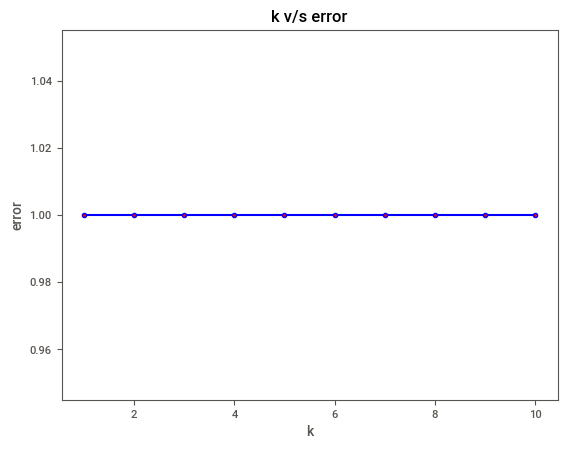

In [ ]:
plt.plot(range(1,11),error_rate,color='blue',marker="o",markerfacecolor='red')
plt.xlabel("k")
plt.ylabel("error")
plt.title("k v/s error")

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
KNN=KNeighborsRegressor(n_neighbors=4)
KNN.fit(x_train,y_train)
y_pred=KNN.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [ ]:
mse=mean_squared_error(y_test,y_pred)
mse

39854881.41624473

In [ ]:
mae=mean_absolute_error(y_test,y_pred)
mae

3760.493353449005

In [ ]:
## RMSE
RMSE=np.sqrt(MSE)
r2_score(y_test,y_pred)     # KNN r2_score

0.7226367605001429

## Decision Tree

In [ ]:
# Split data into x and y
x=data1.drop('charges',axis=1)
y=data1['charges']

In [ ]:
# split data for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor # Import the algorithm
model2=DecisionTreeRegressor()     # initialise the model
model2.fit(x_train,y_train)        #train the model
y_pred=model2.predict(x_test)      # Predictions -- x_test

In [ ]:
y_train_predict=model2.predict(x_train)

In [ ]:
y_train_predict

array([27322.73386, 42303.69215, 42112.2356 , 41676.0811 , 44202.6536 ,
        3490.5491 , 11945.1327 , 22462.04375,  5272.1758 ,  2166.732  ,
        6457.8434 , 12094.478  , 19515.5416 ,  1633.9618 ,  2523.1695 ,
       11566.30055,  5969.723  ,  4074.4537 ,  6600.20595,  1242.816  ,
       32548.3405 ,  5469.0066 ,  6067.12675,  3171.6149 ,  5375.038  ,
        8823.98575,  7633.7206 ,  7144.86265, 10096.97   , 12890.05765,
        7986.47525, 36189.1017 ,  5976.8311 , 10601.412  , 12982.8747 ,
       10065.413  , 24671.66334,  2534.39375,  4350.5144 ,  8671.19125,
       39725.51805, 12643.3778 , 48173.361  , 35585.576  , 35160.13457,
        1263.249  ,  1628.4709 ,  1261.442  ,  8444.474  , 36124.5737 ,
        8596.8278 ,  3366.6697 ,  9447.3824 , 10959.33   , 22395.74424,
        3943.5954 , 21984.47061, 11881.358  ,  9910.35985,  5261.46945,
        2438.0552 , 26018.95052, 14410.9321 , 33475.81715, 21659.9301 ,
        2902.9065 ,  1769.53165,  3972.9247 , 34838.873  ,  2897

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [ ]:
MSE=mean_squared_error(y_test,y_pred)
MSE

36630988.73087812

In [ ]:
MAE=mean_absolute_error(y_test,y_pred)
MAE

2747.2415906940296

In [ ]:
## RMSE
RMSE=np.sqrt(MSE)
r2_score(y_train,y_train_predict)   #training score

1.0

In [ ]:
## RMSE
RMSE=np.sqrt(MSE)
r2_score(y_test,y_pred)   #testing score

0.7859310463467484

Here training score is good but testing score is bad.So it results overfitting.To overcome this,we are using hyper parameter tuning in decision tree.

In [ ]:
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV
params = {
    "criterion":('mse', 'friedman_mse', 'mae'),
    "splitter":("best", "random"),
    "max_depth":(list(range(1, 20))),
    "min_samples_split":[2, 3, 4],
    "min_samples_leaf":list(range(1, 20)),
}

In [ ]:
# Applying the Grid Search CV

dtc = DecisionTreeRegressor()
model3= GridSearchCV(dtc, params, scoring='neg_mean_squared_error', cv=5)
model3.fit(x_train,y_train)
best_params = model3.best_params_
print(model3.best_params_)

{'criterion': 'friedman_mse', 'max_depth': 5, 'min_samples_leaf': 9, 'min_samples_split': 3, 'splitter': 'best'}


In [ ]:
dtc1 = DecisionTreeRegressor(criterion='friedman_mse',max_depth= 5, min_samples_leaf= 9, min_samples_split= 3, splitter='best')
dtc1.fit(x_train,y_train)
y_predict=dtc1.predict(x_test)

In [ ]:
y_train_pred = dtc1.predict(x_train)

In [ ]:
# Evaluate the model on the test set
mse = mean_squared_error(y_test, y_predict)
print("Mean Squared Error on Test Set: ", mse)

Mean Squared Error on Test Set:  21839258.650554698


In [ ]:
mse = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error on Test Set: ", mse)

Mean Squared Error on Test Set:  17280226.71504799


In [ ]:
mean_absolute_error(y_test,y_predict)

2526.500588756107

In [ ]:
mean_absolute_error(y_train,y_train_pred)

2319.6716384041574

In [ ]:
## RMSE
RMSE=np.sqrt(MSE)
r2_score(y_train,y_train_predict)   #training score

1.0

In [ ]:
## RMSE
RMSE=np.sqrt(MSE)
r2_score(y_test,y_predict)   #testing score

0.8723728894615917

After applying hyper parameter tuning, we can clearly see better testing score as compared to the previous score

In [ ]:
# do the prediction after entering values such as age=22,bmi=35.520,children=4,region=2,sex=female(0),smoker_no=0
model3.predict([[22,35.520,4,2,0,0]])

array([21592.053258])

## Random Forest

In [ ]:
# Split data into x and y
x=data1.drop('charges',axis=1)
y=data1['charges']

In [ ]:
# split data for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=4)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model4=RandomForestRegressor()
model4.fit(x_train,y_train)
y_pred=model4.predict(x_test)

In [ ]:
y_train_pred=model4.predict(x_train)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [ ]:
MSE=mean_squared_error(y_train,y_train_pred)
MSE

3416461.725002298

In [ ]:
MSE=mean_squared_error(y_test,y_pred)
MSE

21168525.854377408

In [ ]:
MAE=mean_absolute_error(y_train,y_train_pred)
MAE

1043.5076118279146

In [ ]:
MAE=mean_absolute_error(y_test,y_pred)
MAE

2609.0446712114426

In [ ]:
## RMSE
RMSE=np.sqrt(MSE)
r2_score(y_train,y_train_pred)   #training score

0.9768782953276727

In [ ]:
## RMSE
RMSE=np.sqrt(MSE)
r2_score(y_test,y_pred)   #testing score

0.8526812601677082

Here also training score is more as compared to the testing score and results overfitting.To solve this problem we are applying hyper parameter tuning technique.

In [ ]:
#hyperparameter tuning
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error

In [ ]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
from sklearn.model_selection import RandomizedSearchCV
# Define the parameter distribution to sample from
param_dist = {
    'n_estimators': [int(x) for x in np.linspace(10, 200, 10)],  # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at each split
    'max_depth': [int(x) for x in np.linspace(10, 110, 11)],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

In [ ]:
# Create RandomizedSearchCV
rf_cv = RandomizedSearchCV(estimator=model4, param_distributions=param_dist, n_iter=10,
                            scoring='neg_mean_squared_error', cv=5, random_state=42)
rf_cv.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 31, 52, 73, 94,
                                                         115, 136, 157, 178,
                                                         200]},
                   random_state=42, scoring='neg_mean_squared_error')

In [ ]:
# Print the best parameters and corresponding MSE score
print("Best Parameters: ", rf_cv.best_params_)
print("Best Negative Mean Squared Error: ", rf_cv.best_score_)


Best Parameters:  {'n_estimators': 10, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 40}
Best Negative Mean Squared Error:  -22515678.989252515


In [ ]:
model4 = RandomForestRegressor(n_estimators=10, min_samples_split=10, min_samples_leaf= 2, max_features='auto',max_depth= 40)
model4.fit(x_train,y_train)
y_predict=dtc1.predict(x_test)

In [ ]:
y_train_pred = model4.predict(x_train)

In [ ]:
# Evaluate the model on the test set
mse = mean_squared_error(y_test, y_predict)
print("Mean Squared Error on Test Set: ", mse)

Mean Squared Error on Test Set:  20014442.312149588


In [ ]:
mse = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error on Test Set: ", mse)

Mean Squared Error on Test Set:  11883559.208776606


In [ ]:
mean_absolute_error(y_test,y_predict)

2472.014709859366

In [ ]:
mean_absolute_error(y_train,y_train_pred)

1895.0491235652582

In [ ]:
## RMSE
RMSE=np.sqrt(MSE)
r2_score(y_train,y_train_pred)   #training score

0.918282400560771

In [ ]:
## RMSE
RMSE=np.sqrt(MSE)
r2_score(y_test,y_predict)   #testing score

0.8674864781521182

Here testing score and traing score are better,when we are applying hyper parameter tuning.The result is good as compared to the previous score.

In [ ]:
# do the prediction after entering values such as age=22,bmi=35.520,children=4,region=2,sex=female(0),smoker_no=0
rf_cv.predict([[22,35.520,4,2,0,0]])

array([21012.44433116])

## Boosting

## Gradient Boosting

In [ ]:
# Split data into x and y
x=data1.drop('charges',axis=1)
y=data1['charges']

In [ ]:
# split data for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=4)

In [ ]:
## Model Building
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)

GradientBoostingRegressor()

In [ ]:
y_pred=gb.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [ ]:
MSE=mean_squared_error(y_test,y_pred)
MSE

18433572.377976347

In [ ]:
MAE=mean_absolute_error(y_test,y_pred)
MAE

2377.2381771504874

In [ ]:
## RMSE
RMSE=np.sqrt(MSE)
r2_score(y_test,y_pred)

0.8717147017221674

In [ ]:
# do the prediction after entering values such as age=22,bmi=35.520,children=4,region=2,sex=female(0),smoker_no=0
gb.predict([[22,35.520,4,2,0,0]])

array([31679.02360008])

## XG Boost

In [ ]:
# Split data into x and y
x=data1.drop('charges',axis=1)
y=data1['charges']

In [ ]:
# split data for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=4)

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBRegressor
model5=XGBRegressor()
model5.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred=model5.predict(x_test)

In [ ]:
MSE=mean_squared_error(y_test,y_pred)
MSE

25403525.30409019

In [ ]:
MAE=mean_absolute_error(y_test,y_pred)
MAE

2967.8346414998155

In [ ]:
## RMSE
RMSE=np.sqrt(MSE)
r2_score(y_test,y_pred)

0.8232085048887607

In [ ]:
# applying hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
param_grid={'gamma':[0.01,0.2,0.4,0.8,0.1,2,101.2,42.5],
           'learning_rate':[0.01,0.02,0.04,0.18,0.28],
           'max_depth':[4,8,5,6,9,12,15,20,22,24],
           'n_estimators':[25,56,45,89,125,250,450,280],
           'reg_alpha':[0,0.1,0.4,0.2,0.6,0.8,12.5,8.5],
           'reg_lambda':[0,0.1,0.2,0.4,0.8,1.8,6.5,8.25,4.8]}

In [ ]:
XGB=XGBRegressor(random_state=4,verbosity=0)

In [ ]:
rcv=RandomizedSearchCV(estimator=XGB,scoring='r2',param_distributions=param_grid,n_iter=100,cv=3,verbose=2,random_state=42,n_jobs=-1)

In [ ]:
rcv.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          random_state=4, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'gamma': [0.01, 0.2, 0.4, 0.8, 0.1, 2,
                                                  101.2, 42.5],
                                        'learning_rate': [0.01, 0.02, 0.04,
                                                          0.18, 0.28],
                                        'max_depth': [4, 8, 5, 6, 9, 12, 15, 20,
                                                      22, 24],
                                        'n_estimators': [25, 56, 45, 89, 125,
                                                         250, 450, 280],
                                        'reg_alpha': [0, 0.1, 0.4, 0.2, 0.6,
                                                      0.8, 12.5, 8.5],
                                        'reg_lambda': [0, 0.1, 0.2, 0.4, 0.8,
                                                       1.8, 6.5, 8.25, 4.8]},
                   random_state=42, scoring='r2', verbose=2)

In [ ]:
cv_best_params=rcv.best_params_
print(f'best parameters:{cv_best_params}')

best parameters:{'reg_lambda': 1.8, 'reg_alpha': 0.8, 'n_estimators': 125, 'max_depth': 4, 'learning_rate': 0.04, 'gamma': 42.5}


In [ ]:
XGB_model=XGBRegressor(reg_lambda= 1.8, reg_alpha=0.8, n_estimators=125, max_depth=4, learning_rate=0.04, gamma=42.5)
XGB_model.fit(x_train,y_train)
y_predict=XGB_model.predict(x_test)

In [ ]:
y_train_pred=XGB_model.predict(x_train)

In [ ]:
MSE=mean_squared_error(y_test,y_pred)
MSE

25403525.30409019

In [ ]:
MAE=mean_absolute_error(y_test,y_pred)
MAE

2967.8346414998155

In [ ]:
## RMSE
RMSE=np.sqrt(MSE)
r2_score(y_test,y_pred)

0.8232085048887607

In [ ]:
# do the prediction after entering values such as age=22,bmi=35.520,children=4,region=2,sex=female(0),smoker_no=0
rcv.predict([[22,35.520,4,2,0,0]])

array([24645.506], dtype=float32)

# Model Comparision

1. Linear Regression

* r2_score-0.7598 i.e 76%

2. KNN

* r2_score- 0.7226 i.e 72%

3. Decision Tree

*  Training r2_score-1.0 i.e 100%

*  Testing r2_score-0.7859.e 78%

After hyperparameter tuning

* Training r2_score-1.0 i.e 100%

* Testing r2_score-0.8723 i.e 87%

4. Random Forest

* Training r2_score-0.9768 i.e 97%

* Testing r2_score-0.8526 i.e 85%

After hyperparameter tuning

Training r2_score-0.9182 i.e 91%

Testing r2_score-0.8674 i.e 86%

5. Boosting

a.Gradient Boosting

* r2_score-0.8717 i.e 87%

b.XGBoost

* r2_score-0.8232 i.e 82%

# Conclusion

After comparision,we conclude that random forest model is the best model.The score of this model is 86% which have very less difference from the training score after applying hyperparameter tuning.

